##  Rainfall Trends in India Analysis: Overview and Dataset
In this analysis, we aim to uncover long-term trends, seasonal patterns, and anomalies in India’s rainfall data. We will examine historical rainfall trends, detect years with extreme or deficient rainfall, explore relationships between seasonal and annual rainfall, and forecast future rainfall using time series models.

For this analysis, we rely on a dataset containing monthly, seasonal, and annual rainfall measurements spanning over a century. I found an ideal dataset for this task, which includes monthly rainfall values, seasonal aggregations (e.g., monsoon rainfall), and annual totals, all of which are essential for understanding variability, detecting anomalies, and predicting future trends. You can download the dataset from here.
# https://statso.io/rainfall-trends-in-india-case-study/#google_vignette

Now, we will begin by loading and exploring the dataset, which contains rainfall data for India from 1901 to 2015. Each record provides monthly, seasonal, and annual rainfall measurements. This data is critical for understanding long-term trends, seasonal variations, and extreme weather events:

In [69]:
import pandas as pd

rainfall_data = pd.read_csv("rainfall_area-wt_India_1901-2015.csv")

print(rainfall_data.head())

  REGION  YEAR   JAN   FEB   MAR   APR   MAY    JUN    JUL    AUG    SEP  \
0  INDIA  1901  34.7  37.7  18.0  39.3  50.8  113.4  242.2  272.9  124.4   
1  INDIA  1902   7.4   4.3  19.0  43.5  48.3  108.8  284.0  199.7  201.5   
2  INDIA  1903  17.0   8.3  31.3  17.1  59.5  118.3  297.0  270.4  199.1   
3  INDIA  1904  14.4   9.6  31.8  33.1  72.4  164.8  261.0  206.4  129.6   
4  INDIA  1905  25.3  20.9  42.7  33.7  55.7   93.3  252.8  200.8  178.4   

     OCT   NOV   DEC  ANNUAL  Jan-Feb  Mar-May  Jun-Sep  Oct-Dec  
0   52.7  38.0   8.3  1032.3     72.4    108.1    752.8     99.0  
1   61.5  27.9  24.4  1030.2     11.7    110.8    794.0    113.8  
2  117.9  36.9  17.7  1190.5     25.3    107.9    884.8    172.5  
3   69.0  11.2  16.3  1019.8     24.0    137.4    761.8     96.6  
4   51.4   9.7  10.5   975.3     46.2    132.2    725.4     71.6  


# Analyzing Annual Rainfall Trends Over Time
To understand the broader trends, we will plot three plots:

We will plot annual rainfall over time and compare it with the overall mean. This helps identify whether there is a noticeable long-term trend, such as an increase or decrease in rainfall over the years.
We will calculate the average rainfall for each month across all years. And by plotting a bar chart, we can identify the months with the highest and lowest average rainfall.
Next, we will analyze seasonal rainfall by aggregating rainfall data into four seasons: 
# Jan-Feb, Mar-May, Jun-Sep (Monsoon), and Oct-Dec.

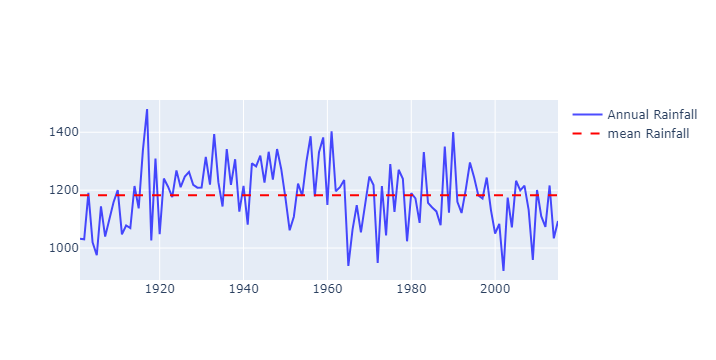

In [70]:
import plotly.graph_objects as gh
import plotly.express as ex

# analyze trends in annual rainfall over time
annual_rainfall =  rainfall_data[['YEAR', 'ANNUAL']]

fig_annual = gh.Figure()
fig_annual.add_trace(gh.Scatter(
    x=annual_rainfall['YEAR'],
    y=annual_rainfall['ANNUAL'],
    mode='lines',
    name='Annual Rainfall',
    line=dict(color='blue', width=2),
    opacity=0.7
    ))
fig_annual.add_trace(gh.Scatter(
    x=annual_rainfall['YEAR'],
    y=[annual_rainfall['ANNUAL'].mean()]*len(annual_rainfall),
    mode='lines',
    name='mean Rainfall',
    line=dict(color='red', dash='dash')
))
fig_annual.show()

The above graph shows significant year-to-year variability in India’s annual rainfall, with no apparent long-term upward or downward trend over the century. The red dashed line indicates the mean rainfall, around which the annual rainfall oscillates. Notable peaks and troughs highlight extreme rainfall events and dry years.

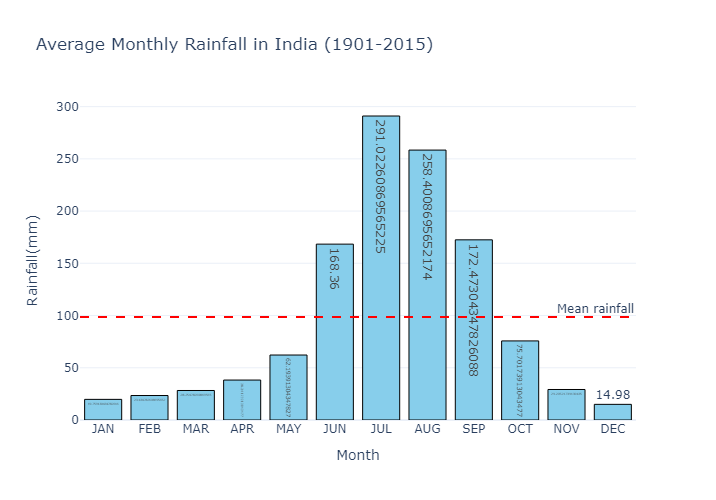

In [71]:
# identify months with the highest and lowest rainfall on average
monthly_columns = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
monthly_avg = rainfall_data[monthly_columns].mean()

highest_rainfall_month = monthly_avg.idxmax()
lowest_rainfall_month = monthly_avg.idxmin()

fig_monthly = ex.bar(
    x=monthly_avg.index,
    y=monthly_avg.values,
    labels={'x':'Month', 'y':'Rainfall(mm)'},
    title='Average Monthly Rainfall in India (1901-2015)',
    text=monthly_avg.values
)
fig_monthly.add_hline(
    y=monthly_avg.mean(),
    line_dash='dash',
    line_color='red',
    annotation_text='Mean rainfall',
    annotation_position='top right'
)
fig_monthly.update_traces(marker_color='skyblue', marker_line_color='black', marker_line_width=1)
fig_monthly.update_layout(template='plotly_white', height=500)
fig_monthly.show()  

This bar chart illustrates a highly uneven distribution of rainfall across months, with July and August receiving the highest average rainfall. The red dashed line represents the mean monthly rainfall, showing that most months receive rainfall below the average, except during the monsoon months (June to September).

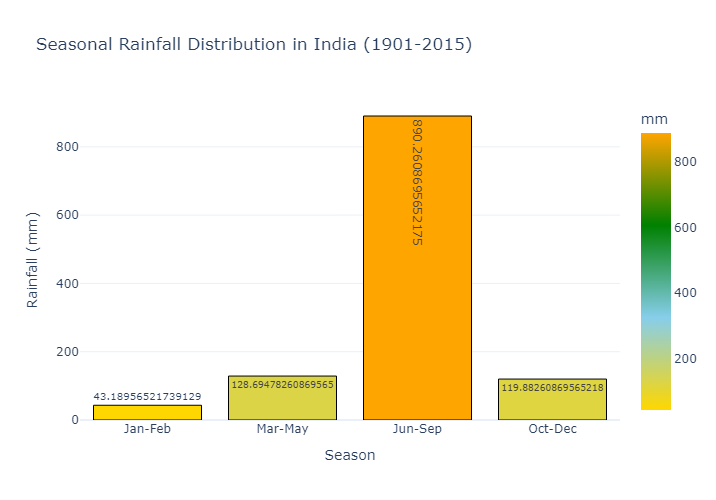

In [72]:
# seasonal rainfall distribution
seasonal_columns = ['Jan-Feb', 'Mar-May', 'Jun-Sep', 'Oct-Dec']
seasonal_avg = rainfall_data[seasonal_columns].mean()

fig_seasonal = ex.bar(
    x=seasonal_avg.index,
    y=seasonal_avg.values,
    labels={'x': 'Season', 'y': 'Rainfall (mm)'},
    title='Seasonal Rainfall Distribution in India (1901-2015)',
    text=seasonal_avg.values,
    color=seasonal_avg.values,
    color_continuous_scale=['gold', 'skyblue', 'green', 'orange']
)

fig_seasonal.update_traces(marker_line_color='black', marker_line_width=1)
fig_seasonal.update_layout(
    template='plotly_white',
    height=500,
    coloraxis_colorbar=dict(title='mm')
)
fig_seasonal.update_layout(template='plotly_white', height=500)
fig_seasonal.show()

The seasonal distribution highlights the dominance of the monsoon season (June to September), which contributes the bulk of annual rainfall (around 890 mm). In contrast, the other seasons (January-February, March-May, and October-December) contribute significantly less to the annual total, which emphasizes the critical role of the monsoon.

## Assessing the Impact of Climate Change in the Rainfall Trends in India
Now, we will calculate a 10-year rolling average of annual rainfall to identify long-term trends and smooth out short-term variations. This will help assess the potential impact of climate change on rainfall patterns:

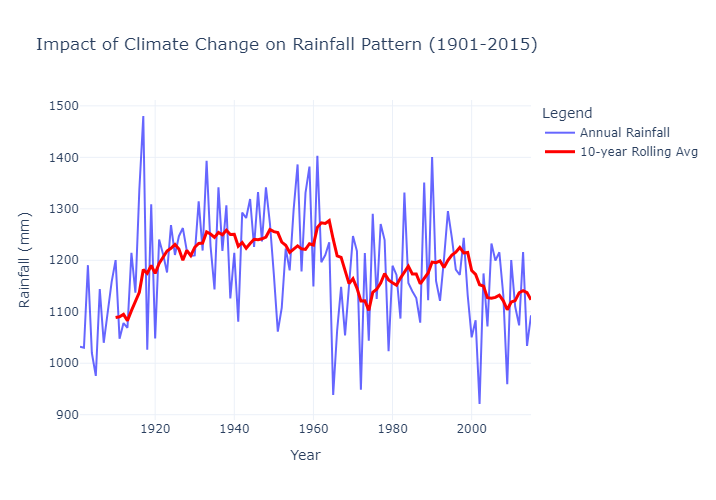

In [73]:
# calculating rolling averages to assess climate change impact
rainfall_data['10-Year Rolling Avg'] = rainfall_data['ANNUAL'].rolling(window=10).mean()

fig_climate_change = gh.Figure()

fig_climate_change.add_trace(gh.Scatter(
    x=rainfall_data['YEAR'],
    y=rainfall_data['ANNUAL'],
    mode='lines',
    name='Annual Rainfall',
    line=dict(color='blue', width=2),
    opacity=0.6
))
fig_climate_change.add_trace(gh.Scatter(
    x=rainfall_data['YEAR'],
    y=rainfall_data['10-Year Rolling Avg'],
    mode='lines',
    name='10-year Rolling Avg',
    line=dict(color='red', width=3)
))
fig_climate_change.update_layout(
    title='Impact of Climate Change on Rainfall Pattern (1901-2015)',
    xaxis_title='Year',
    yaxis_title='Rainfall (mm)',
    template='plotly_white',
    legend=dict(title='Legend'),
    height=500
)
fig_climate_change.show()

This graph shows the annual rainfall trends in India (blue line) and a 10-year rolling average (red line) to identify long-term patterns. While annual rainfall exhibits significant variability, the 10-year rolling average indicates a slight downward trend post-1960, which suggests a possible impact of climate change on rainfall distribution. Periods of higher averages in the early 20th-century contrast with more consistent but lower averages in recent decades.

Now, using statistical thresholds (1.5 standard deviations below or above the mean), let’s identify years with extreme or deficient rainfall. This will help detect drought years and periods of excessive rainfall:

In [74]:
from scipy.stats import pearsonr

# identifying drought and extreme rainfall years
mean_rainfall = rainfall_data['ANNUAL'].mean()
std_dev_rainfall = rainfall_data['ANNUAL'].std()

drought_years = rainfall_data[rainfall_data['ANNUAL'] < (mean_rainfall - 1.5 * std_dev_rainfall)]
extreme_rainfall_years = rainfall_data[rainfall_data['ANNUAL'] > (mean_rainfall + 1.5 * std_dev_rainfall)]

# correlating seasonal rainfall with annual rainfall totals
seasonal_columns = ['Jan-Feb', 'Mar-May', 'Jun-Sep', 'Oct-Dec']
seasonal_correlations = {
    season: pearsonr(rainfall_data[season], rainfall_data['ANNUAL'])[0] for season in seasonal_columns
}

# displaying results for drought/extreme years and correlations
drought_years_summary = drought_years[['YEAR', 'ANNUAL']].reset_index(drop=True)
extreme_rainfall_years_summary = extreme_rainfall_years[['YEAR', 'ANNUAL']].reset_index(drop=True)
seasonal_correlations_summary = pd.DataFrame.from_dict(seasonal_correlations, orient='index', columns=['Correlation'])

drought_years_summary, extreme_rainfall_years_summary, seasonal_correlations_summary

(   YEAR  ANNUAL
 0  1905   975.3
 1  1965   938.4
 2  1972   948.5
 3  2002   920.8
 4  2009   959.3,
    YEAR  ANNUAL
 0  1917  1480.3
 1  1933  1393.5
 2  1956  1386.2
 3  1959  1382.1
 4  1961  1403.0
 5  1988  1351.0
 6  1990  1400.6,
          Correlation
 Jan-Feb     0.228913
 Mar-May     0.313057
 Jun-Sep     0.930027
 Oct-Dec     0.531648)

The analysis identifies five significant drought years (e.g., 2002 and 2009) and seven extreme rainfall years (e.g., 1917 and 1990) based on deviations from the mean annual rainfall. Seasonal rainfall correlations with annual totals reveal that the monsoon season (June-September) has the strongest correlation (0.93), which indicates it predominantly drives annual rainfall patterns. In contrast, other seasons like January-February (0.23) and March-May (0.31) have weaker correlations, which emphasizes the critical role of the monsoon in India’s overall rainfall dynamics.

## Detecting Anomalies in the Rainfall Trends in India
Now, using an Isolation Forest algorithm, we will identify anomalies in both annual and monthly rainfall. This will highlight specific years or months with unusual rainfall patterns. Let’s start with identifying anomalies in annual rainfall:

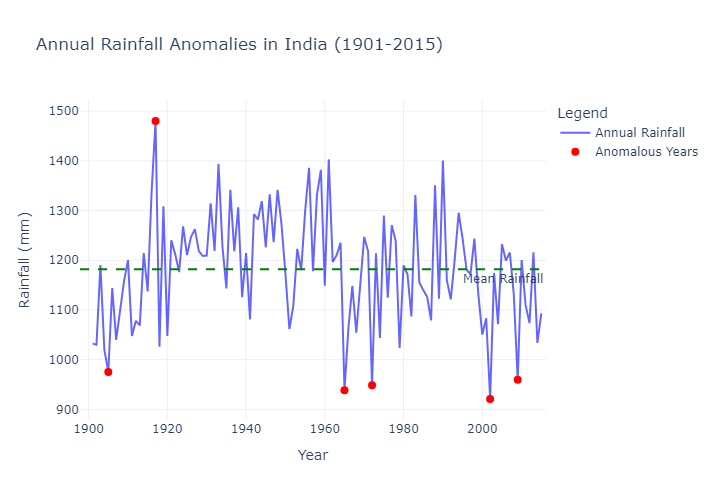

In [75]:
from sklearn.ensemble import IsolationForest

# detect anomalous rainfall years based on annual data
isolation_forest = IsolationForest(contamination=0.05, random_state=42)
rainfall_data['Annual_Anomaly'] = isolation_forest.fit_predict(rainfall_data[['ANNUAL']])

# identify anomalies in annual rainfall
annual_anomalies = rainfall_data[rainfall_data['Annual_Anomaly'] == -1]

# detect anomalous months based on monthly data
monthly_data = rainfall_data[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']]
monthly_anomalies = isolation_forest.fit_predict(monthly_data)

# add anomaly detection results for months
rainfall_data['Monthly_Anomaly'] = monthly_anomalies
monthly_anomalies_df = rainfall_data[rainfall_data['Monthly_Anomaly'] == -1][['YEAR'] + monthly_columns]

fig_annual_anomalies = gh.Figure()

fig_annual_anomalies.add_trace(gh.Scatter(
    x=rainfall_data['YEAR'],
    y=rainfall_data['ANNUAL'],
    mode='lines',
    name='Annual Rainfall',
    line=dict(color='blue', width=2),
    opacity=0.6
))

fig_annual_anomalies.add_trace(gh.Scatter(
    x=annual_anomalies['YEAR'],
    y=annual_anomalies['ANNUAL'],
    mode='markers',
    name='Anomalous Years',
    marker=dict(color='red', size=8, symbol='circle')
))

fig_annual_anomalies.add_hline(
    y=rainfall_data['ANNUAL'].mean(),
    line_dash='dash',
    line_color='green',
    annotation_text='Mean Rainfall',
    annotation_position='bottom right'
)

fig_annual_anomalies.update_layout(
    title='Annual Rainfall Anomalies in India (1901-2015)',
    xaxis_title='Year',
    yaxis_title='Rainfall (mm)',
    template='plotly_white',
    legend=dict(title="Legend"),
    height=500
)

fig_annual_anomalies.show()

This graph highlights years with significant rainfall anomalies, where annual rainfall deviated substantially from the mean. Drought years (e.g., 1905, 1965, 2002) and extreme rainfall years (e.g., 1917, 1961) are marked as red points, which showcase outliers in rainfall patterns. While most years cluster around the mean (green dashed line), the anomalies emphasize the variability in India’s rainfall, driven by factors like monsoonal fluctuations and climate events. This underscores the need for monitoring and preparedness for extreme weather events.

Now, let’s identify anomalies in monthly rainfall:

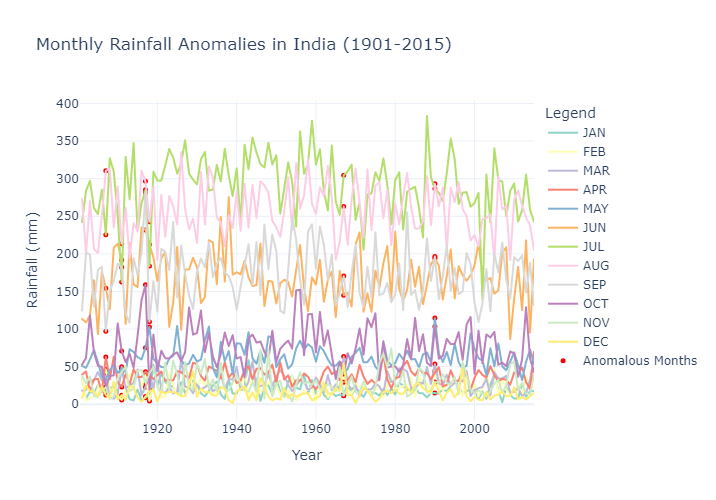

In [76]:
# preparing data for monthly anomalies
monthly_anomalies = []
for column in monthly_columns:
    for _, row in monthly_anomalies_df.iterrows():
        monthly_anomalies.append({'Year': row['YEAR'], 'Month': column, 'Rainfall': row[column]})

monthly_anomalies_df_long = pd.DataFrame(monthly_anomalies)

fig_monthly_anomalies = ex.line(
    rainfall_data,
    x='YEAR',
    y=monthly_columns,
    labels={'YEAR': 'Year', 'value': 'Rainfall (mm)', 'variable': 'Month'},
    title='Monthly Rainfall Anomalies in India (1901-2015)',
    color_discrete_sequence=ex.colors.qualitative.Set3
)

fig_monthly_anomalies.add_trace(gh.Scatter(
    x=monthly_anomalies_df_long['Year'],
    y=monthly_anomalies_df_long['Rainfall'],
    mode='markers',
    name='Anomalous Months',
    marker=dict(color='red', size=5, symbol='circle')
))

fig_monthly_anomalies.update_layout(
    template='plotly_white',
    legend=dict(title="Legend"),
    height=500
)

fig_monthly_anomalies.show()

The variability is most pronounced during the monsoon months (June to September), which reflects the critical role of these months in India’s rainfall dynamics. Anomalies in non-monsoon months, while less frequent, highlight periods of unusual weather patterns, potentially linked to climate variability or regional disturbances. This graph underscores the uneven distribution and high dependence on monsoonal rainfall for India’s water resources.

## Correlating Seasonal Rainfall with Annual Totals
Now, we will calculate the correlation coefficients between seasonal rainfall and annual rainfall totals to understand how much each season contributes to the overall yearly rainfall:

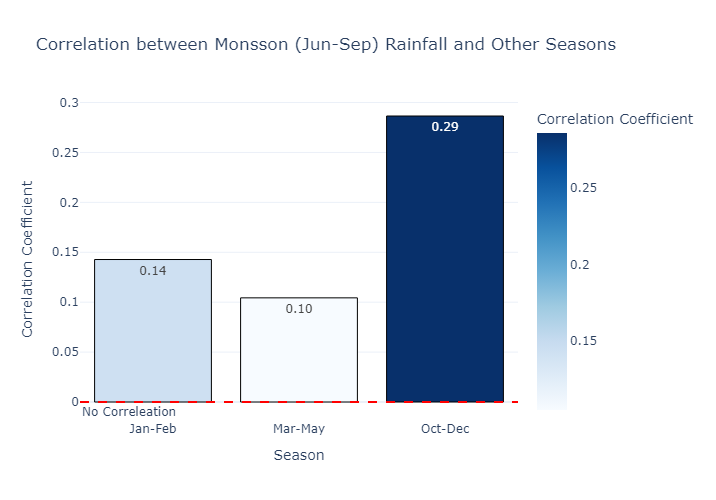

In [77]:
# correlation analysis between monsoon (Jun-Sep) rainfall and other seasons
seasonal_columns = ['Jan-Feb', 'Mar-May', 'Jun-Sep', 'Oct-Dec']

monsoon_column = 'Jun-Sep'
relationships = {}

for season in seasonal_columns:
    if season != monsoon_column:
        corr, _ = pearsonr(rainfall_data[monsoon_column], rainfall_data[season])
        relationships[season] = corr

correlation_data = pd.DataFrame({
    'Season':list(relationships.keys()),
    'Correlation Coefficient': list(relationships.values())
})

fig = ex.bar(
    correlation_data,
    x='Season',
    y='Correlation Coefficient',
    title='Correlation between Monsson (Jun-Sep) Rainfall and Other Seasons',
    labels={'Season':'Season', 'Correlation Coefficient':'Correlation Coefficient'},
    text='Correlation Coefficient',
    color='Correlation Coefficient',
    color_continuous_scale='Blues'
)

fig.add_hline(
    y=0,
    line_dash='dash',
    line_color='red',
    annotation_text='No Correleation',
    annotation_position='bottom left'
)

fig.update_traces(marker_line_color='black', marker_line_width=1, texttemplate='%{text:.2f}')
fig.update_layout(
    template='plotly_white',
    height=500
)

fig.show()

This graph shows the correlation between monsoon rainfall and rainfall during other seasons. The October-December season has the highest correlation (0.29), which suggests a moderate relationship, possibly due to the post-monsoon retreat rains. The January-February (0.14) and March-May (0.10) seasons exhibit weaker correlations, which indicate minimal dependence on monsoon rainfall. This highlights the dominance of monsoonal patterns as an independent driver of India’s annual rainfall, with limited spillover effects on other seasons.

## Grouping Years Based on Rainfall Patterns
Now, by applying k-means clustering, we will group years into three categories: Dry, Normal, and Wet, based on rainfall patterns:

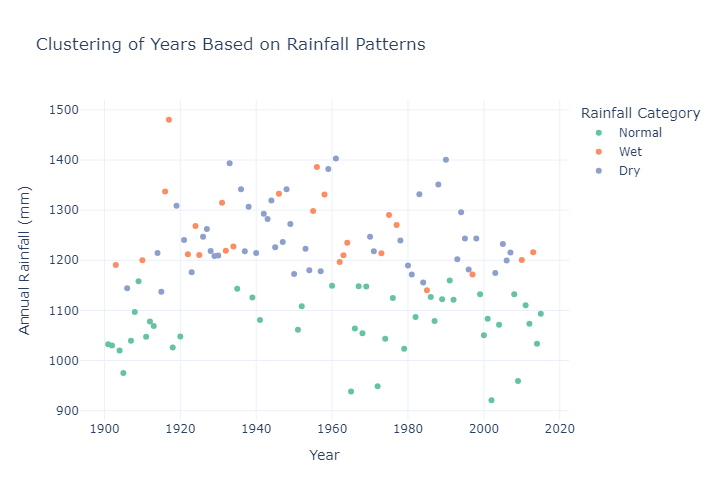

In [78]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# prepare data for clustering
rainfall_features = rainfall_data[['Jan-Feb', 'Mar-May', 'Jun-Sep', 'Oct-Dec', 'ANNUAL']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(rainfall_features)

# perform k-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
rainfall_data['Rainfall_Cluster'] = kmeans.fit_predict(scaled_features)

# map cluster labels to categories (e.g., Dry, Normal, Wet)
cluster_labels = {0: 'Dry', 1: 'Normal', 2: 'Wet'}
rainfall_data['Rainfall_Category'] = rainfall_data['Rainfall_Cluster'].map(cluster_labels)

fig = ex.scatter(
    rainfall_data,
    x='YEAR',
    y='ANNUAL',
    color='Rainfall_Category',
    title='Clustering of Years Based on Rainfall Patterns',
    labels={'YEAR': 'Year', 'ANNUAL': 'Annual Rainfall (mm)', 'Rainfall_Category': 'Rainfall Category'},
    color_discrete_sequence=ex.colors.qualitative.Set2,
    hover_data={'Rainfall_Cluster': True, 'Rainfall_Category': True}
)

fig.update_layout(
    template='plotly_white',
    legend_title='Rainfall Category',
    height=500
)

fig.show()

The clusters reveal that most years fall into the Normal category, while Wet years (above-normal rainfall) are sporadically distributed throughout the timeline, with a concentration in the early and mid-20th century. Dry years (below-normal rainfall) are more frequent in the latter half of the timeline, which indicates a potential shift in rainfall patterns over time. This clustering emphasizes the variability and potential long-term changes in India’s rainfall dynamics.

## Forecasting Future Rainfall
Finally, we will use the Prophet library to forecast annual rainfall for the next 20 years:

18:26:36 - cmdstanpy - INFO - Chain [1] start processing
18:26:36 - cmdstanpy - INFO - Chain [1] done processing


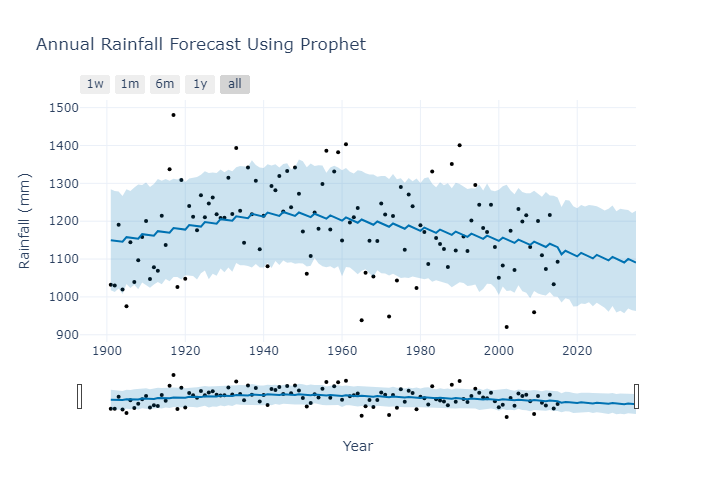

In [79]:
rainfall_data['DATE'] = pd.to_datetime(rainfall_data['YEAR'], format='%Y')
annual_rainfall_ts = rainfall_data.set_index('DATE')['ANNUAL']

from prophet import Prophet
prophet_data = annual_rainfall_ts.reset_index()
prophet_data.columns = ['ds', 'y']

from prophet.plot import plot_plotly, plot_components_plotly

prophet_model = Prophet()
prophet_model.fit(prophet_data)

# create a future dataframe for the next 20 years
future = prophet_model.make_future_dataframe(periods=20, freq='YE')
forecast = prophet_model.predict(future)

fig_forecast = plot_plotly(prophet_model, forecast)

fig_forecast.update_layout(
    title='Annual Rainfall Forecast Using Prophet',
    xaxis_title='Year',
    yaxis_title='Rainfall (mm)',
    template='plotly_white',
    height=500
)

fig_forecast.show()

The blue line represents the model’s forecast trend, while the shaded area indicates the confidence interval. The trend reveals a slight decline in annual rainfall over time, with notable year-to-year variability (black dots representing actual data points). The model captures the variability well but highlights that future rainfall may continue to slightly decrease, which emphasizes the need for adaptive strategies to manage potential water resource challenges.

In [93]:
import pickle

with open("model.pkl", "wb") as f:
    pickle.dump(prophet_model, f)

## Forecasting Future Rainfall
Finally, we will use the ARIMA to forecast annual rainfall for the next 20 years:

In [82]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

result = adfuller(prophet_data['y']) 
print('ADF Statistic:', result[0]) 
print('p-value:', result[1])

ADF Statistic: -4.245213072637958
p-value: 0.0005519302933461657


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  115
Model:                          ARIMA   Log Likelihood                -703.946
Date:                Sat, 07 Dec 2024   AIC                           1411.892
Time:                        18:45:05   BIC                           1417.382
Sample:                             0   HQIC                          1414.121
                                - 115                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1182.0348     10.275    115.036      0.000    1161.895    1202.174
sigma2      1.214e+04   1704.854      7.122      0.000    8800.676    1.55e+04
Ljung-Box (L1) (Q):                   1.84   Jarque-

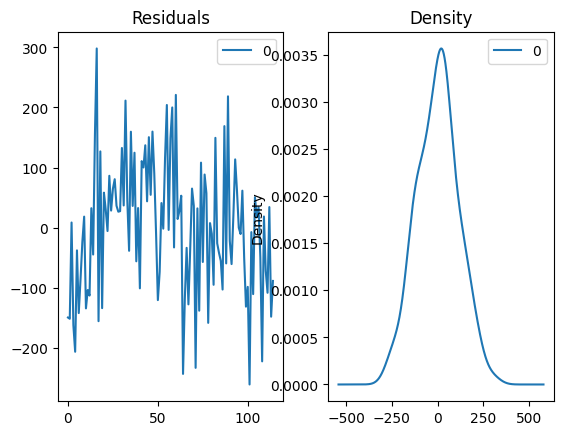

In [90]:
# Fit ARIMA Model
arima_model = ARIMA(prophet_data['y']) 
arima_model_fit = model.fit() 
print(arima_model_fit.summary())

# Plot Residuals
residuals = pd.DataFrame(arima_model_fit.resid) 
fig, ax = plt.subplots(1, 2) 
residuals.plot(title="Residuals", ax=ax[0]) 
residuals.plot(kind='kde', title='Density', ax=ax[1]) 
plt.show()

In [94]:
# Forecast
forecast_arima = arima_model_fit.forecast(steps=100) 

fig_forecast_arima = plot_plotly(prophet_model, forecast_arima)

fig_forecast_arima.update_layout(
    title='Annual Rainfall Forecast Using Prophet',
    xaxis_title='Year',
    yaxis_title='Rainfall (mm)',
    template='plotly_white',
    height=500
)

fig_forecast_arima.show()

KeyError: 'ds'